In [1]:
import pandas as pd

### 📖Prepare Data

In [2]:
df = pd.read_csv("./Data/Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 📖Check whether data is balanced

In [3]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### 📖Drop all columns with irrelevant data
None in this dataset, but remember when using other datasets!

### 📖Check for missing data

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 📖Drop NaN Data

In [5]:
#df.dropna()

### 📖Create numerical classes
Currently the classes are defined by strings ("Iris setosa" etc.).
Many algorithms can not use this datatype to classify data. Therefore, we change the strings into numerical categories

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Class"] = le.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [7]:
#Either overwrite the column in the upper cell or drop the numerical class like this
df.drop("Species", axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 📖Divide data into X and Y data


In [8]:
#Seperate x data (features) and y data (class)
x = df.iloc[:, :4]
y = df.iloc[:, 4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

### 📖Seperate into train and test data

In [9]:
type(x.values)

numpy.ndarray

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.33, random_state=42, shuffle=True)

Test which variables contain what

In [11]:
print(f"x_train:  {X_train.shape}")
print(f"y_train:  {y_train.shape}")
print(f"x_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

x_train:  (100, 4)
y_train:  (100,)
x_test:  (50, 4)
y_test:  (50,)


### 📖Build a custom Random Forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(print_changed_only=False)


model = RandomForestClassifier(n_estimators=2, criterion="entropy", max_features=3)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### 📖Check performance

In [22]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_test = model.predict(X_test)
print(f"Accuracy of test data: {accuracy_score(y_test, y_pred_test)}" )

y_pred_train = model.predict(X_train)
print(f"Accuracy of train data: {accuracy_score(y_train, y_pred_train)}")

#ALternatively
print(f"\nAccuracy of test data: {model.score(X_test, y_test)}")
print(f"Accuracy of train data: {model.score(X_train, y_train)}")

Accuracy of test data: 0.98
Accuracy of train data: 1.0

Accuracy of test data: 0.98
Accuracy of train data: 1.0


Text(50.722222222222214, 0.5, 'Truth')

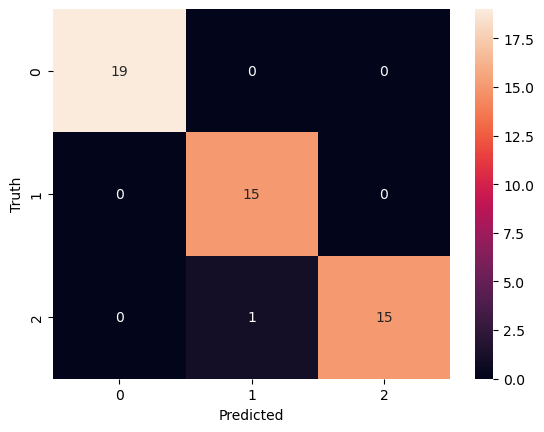

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_pred_test)

#plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


### 📖Feature importances

In [16]:
feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

PetalLengthCm    0.633102
PetalWidthCm     0.332449
SepalWidthCm     0.019613
SepalLengthCm    0.014836
dtype: float64

### 📖Build a basic Random Forest model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(print_changed_only=False)

rf_model = RandomForestClassifier()

In [18]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred_test = rf_model.predict(X_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [20]:
print(f"\nAccuracy of train data: {rf_model.score(X_train, y_train)}")
print(f"Accuracy of test data: {rf_model.score(X_test, y_test)}")


Accuracy of train data: 1.0
Accuracy of test data: 0.98
